In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
digits.target_names  # target class

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
digits.data.shape  # features

(1797, 64)

In [6]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
digits.data[0].shape  # 1D array

(64,)

In [8]:
digits.data[0].reshape(8,8)  # 2D array

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
t = digits.data[0].reshape(8,8)

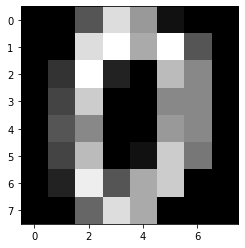

In [10]:
plt.imshow(t, cmap='gray')  # imshow(): To show image
plt.show()

In [11]:
x = digits.data
y = digits.target

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=10)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [14]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [15]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_pred_train))
accuracy_score(y_test,y_pred_test)

0.9902574808629089


0.9861111111111112

In [17]:
knn.predict(x_test[0].reshape(1,-1))

array([5])

In [18]:
y_test[0]

5

In [19]:
np.where(y_test!=y_pred_test)

(array([ 58, 129, 154, 188, 249], dtype=int64),)

In [25]:
# d-distance, t-index of 5 nearest neighbor from index 58
d,t = knn.kneighbors(x_test[58].reshape(1,-1), n_neighbors=5, return_distance=True)

In [26]:
t


array([[ 930, 1293,   75,  897, 1044]], dtype=int64)

In [27]:
d 

array([[23.9582971 , 25.21904043, 26.15339366, 27.12931993, 27.67670501]])

In [28]:
for i in t:
    print(y_train[i])  # images of digit of 5 nearest neighnor

[1 1 1 1 1]


In [29]:
y_test[58] # Actual digit image

8

In [30]:
knn.predict(x_test[58].reshape(1,-1)) # predicted digit image based on voting

array([1])

In [31]:
# similiarly we can check for other 4 indexes.

In [32]:
# find the value of k i.e no. of nearest neighbor
for k in range(1,10):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    print('for k=%d'%k)
    print('testing score: ',knn.score(x_test,y_test))
    print('training score: ',knn.score(x_train,y_train))

for k=1
testing score:  0.9888888888888889
training score:  1.0
for k=2
testing score:  0.9861111111111112
training score:  0.9909533750869868
for k=3
testing score:  0.9888888888888889
training score:  0.9895615866388309
for k=4
testing score:  0.9833333333333333
training score:  0.9895615866388309
for k=5
testing score:  0.9861111111111112
training score:  0.9902574808629089
for k=6
testing score:  0.9833333333333333
training score:  0.988169798190675
for k=7
testing score:  0.9861111111111112
training score:  0.9874739039665971
for k=8
testing score:  0.9805555555555555
training score:  0.9867780097425192
for k=9
testing score:  0.9833333333333333
training score:  0.9860821155184412


In [33]:
# Hence if we decrease the no. of neighbors used then overfitting may occur

In [34]:
# now our model is traind to pred the digits if we give it a input as a gray scale image and process its pi

In [36]:
a=digits.data[1500]

In [37]:
a

array([ 0.,  0.,  0.,  3., 12., 12.,  2.,  0.,  0.,  0.,  7., 15., 16.,
       16.,  0.,  0.,  0.,  4., 15.,  9., 14., 16.,  3.,  0.,  0.,  2.,
        0.,  0., 14., 16.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16.,  0.,
        0.,  0.,  0.,  0.,  0., 15., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
       16., 14.,  1.,  0.,  0.,  0.,  0.,  3., 16., 13.,  2.,  0.])

In [38]:
knn.predict(a.reshape(1,-1)) # here we can give any such array  from any outsource 

array([1])